In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import os

from scale.plot import plot_confusion_matrix, plot_embedding, plot_heatmap
from scale.utils import read_labels, reassign_cluster_with_ref
from scale.specifity import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
input_dir = '../data/Breast_Tumor/' ## containing data.txt and labels.txt
out_dir = '../result/Breast_Tumor/' ## all running results saved in the out_dir

In [3]:
raw = pd.read_csv(input_dir+'data.txt', sep='\t', index_col=0)
ref, classes, le = read_labels(input_dir+'labels.txt', return_enc=True)
y = le.inverse_transform(ref)

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Fig. 4a Feature embedding
different color representing ground truth cell types

In [4]:
os.makedirs('tsne', exist_ok=True)
feature = pd.read_csv(out_dir+'feature.txt', sep='\t', index_col=0, header=None)

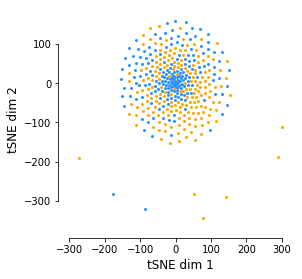

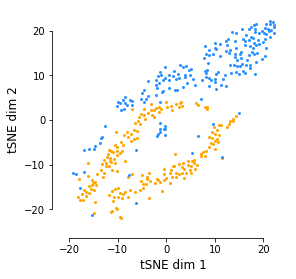

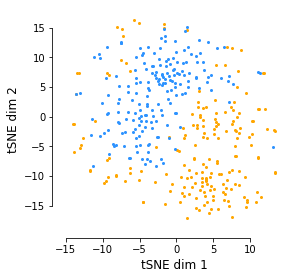

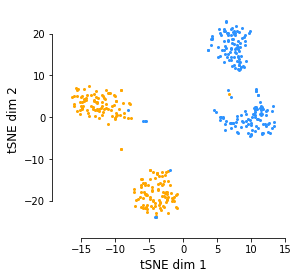

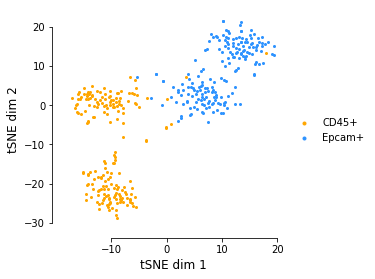

In [5]:
# feature = pd.read_csv(out_dir+'feature.txt', sep='\t', index_col=0, header=None)
# scVI_feature = pd.read_csv(out_dir+'scVI_latent.txt', sep='\t', index_col=0, header=None)
# pca_feature = PCA(n_components=10, random_state=124).fit_transform(raw.T)
# cisTopic_feature = pd.read_csv(out_dir+'cisTopic_tsne.txt', sep=' ', index_col=0).values

for method in ['raw', 'pca', 'scvi', 'cisTopic', 'scale']:
    emb = np.loadtxt(out_dir+'{}_emb.txt'.format(method))
    if method != 'scale':
        show_legend=False
    else:
        show_legend=True
    plot_embedding(emb, y, classes, show_legend=show_legend, markersize=4, cmap = ['#FFA600','#2D93FF'],
                   save_emb='tsne/{}_emb.txt'.format(method), save='tsne/{}_emb.pdf')

## Fig. 4b Clustering accuracy by confusion matrix 
cluster assignments compared with ground truth

In [6]:
os.makedirs('confusion_matrix', exist_ok=True)

In [7]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, f1_score

Method: scABC  ARI score: 0.626  NMI score: 0.518 F1 score: 0.896


/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


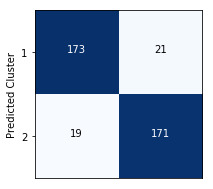

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Method: SC3  ARI score: 0.000  NMI score: 0.002 F1 score: 0.526


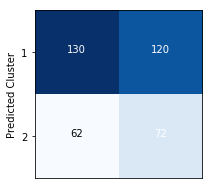

Method: scVI  ARI score: 0.765  NMI score: 0.678 F1 score: 0.938


/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


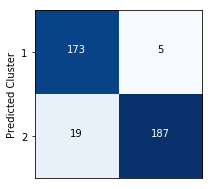

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Method: cisTopic  ARI score: 0.248  NMI score: 0.304 F1 score: 0.750


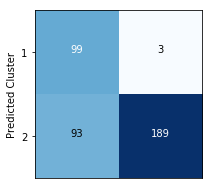

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Method: SCALE  ARI score: 0.918  NMI score: 0.863 F1 score: 0.979


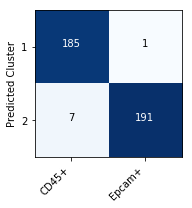

In [8]:
scABC_pred, _ = read_labels(out_dir+'scABC_predict.txt')
SC3_pred, _ = read_labels(out_dir+'SC3_predict.txt')
scVI_pred, _ = read_labels(out_dir+'scVI_predict.txt')
cisTopic_pred, _ = read_labels(out_dir+'cisTopic_predict.txt')
scale_pred, pred_classes = read_labels(out_dir+'cluster_assignments.txt')

show_yticks = True
methods = ['scABC', 'SC3', 'scVI', 'cisTopic', 'SCALE']
for pred, method in zip([scABC_pred, SC3_pred, scVI_pred, cisTopic_pred, scale_pred], methods):
    pred = reassign_cluster_with_ref(pred, ref)
    ari = adjusted_rand_score(ref, pred)
    nmi = normalized_mutual_info_score(ref, pred)
    f1 = f1_score(ref, pred, average='micro')
    pred = le.inverse_transform(pred)
    cm = confusion_matrix(pred, y, labels=classes)

    if method == 'SCALE':
        show_xticks=True
    else:
        show_xticks=False
    print("Method: {}  ARI score: {:.3f}  NMI score: {:.3f} F1 score: {:.3f}".format(method, ari, nmi, f1))
    plot_confusion_matrix(cm, classes, pred_classes+1, title='', normalize=False, figsize=(3,3), show_cbar=False, 
                          show_xticks=show_xticks, show_yticks=True, save='confusion_matrix/'+method+'.pdf')   

## Fig 5

In [9]:
os.makedirs('Figure5', exist_ok=True)
labels_plate = pd.read_csv(input_dir+'labels_plates.txt', sep='\t', index_col=0, header=None)[1].values

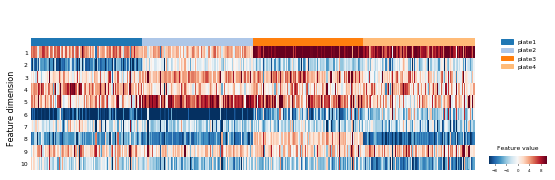

In [10]:
plot_heatmap(feature.T, labels_plate, vmin=-10, vmax=10, figsize=(10, 3), legend_font=6, cmap='RdBu_r', 
             bbox_to_anchor=(1.1, 1.1), position=(0.92, 0.15, .08, .04), ncol=1, 
             yticklabels=range(1, 11), row_cluster=False, ylabel='Feature dimension', cax_title='Feature value',
             save='Figure5/feature_heatmap_plate.pdf'
            )

In [11]:
legend_params = {'loc':'right', 'ncol':1, 'bbox_to_anchor':(1.0, 0.2), 'fontsize':8, 'markerscale':1.5}

### Full

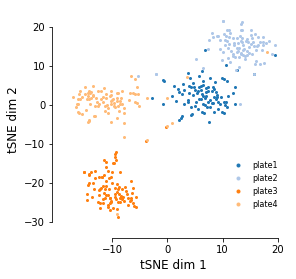

In [12]:
plot_embedding(feature, labels_plate, save_emb='Figure5/full_emb.pdf', **legend_params)

### Plate-related

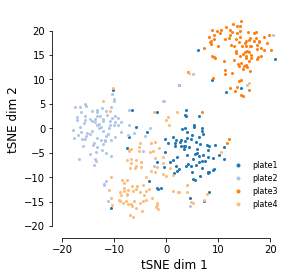

In [13]:
index = [1, 2, 3, 4, 7, 9]
plot_embedding(feature.iloc[:, index], labels_plate, 
               save_emb='Figure5/plate_related_emb.pdf', **legend_params)

### Plate-independent

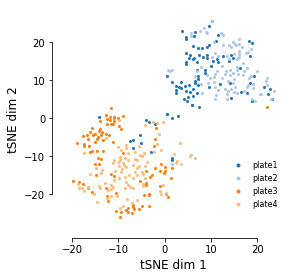

In [14]:
index = [0, 5, 6, 8]
emb = plot_embedding(feature.iloc[:, index], labels_plate, 
                     save_emb='Figure5/plate_independent_emb.pdf', **legend_params)

## Fig. S14

In [15]:
dev = pd.read_csv(out_dir +'cisBP_dev.txt', index_col=0, sep='\t').fillna(0)
var = pd.read_csv(out_dir+'cisBP_var.txt', index_col=0, sep='\t')

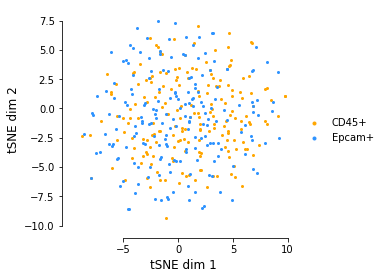

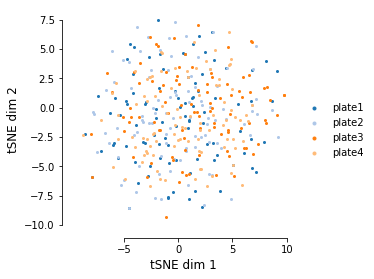

In [16]:
plot_embedding(dev.T, y, cmap=['#FFA600','#2D93FF'])
plot_embedding(dev.T, labels_plate)

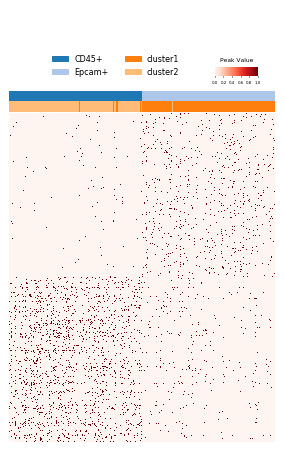

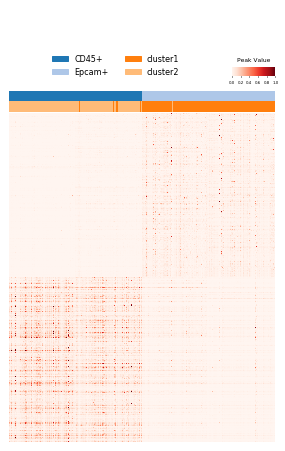

In [17]:
from scale.specifity import cluster_specific, mat_specificity_score

scale_pred_ = reassign_cluster_with_ref(scale_pred, ref)
y_pred = np.array(['cluster'+str(i+1) for i in scale_pred_])

imputed = pd.read_csv(out_dir+'imputed_data.txt', sep='\t', index_col=0)

# score_mat = mat_specificity_score(imputed, scale_pred)
# score_mat.to_csv(out_dir+'score_mat.txt', sep='\t')
score_mat = pd.read_csv(out_dir+'score_mat.txt', sep='\t', index_col=0)

n_top=1000
peak_index, peak_labels = cluster_specific(score_mat, top=n_top)

y_pred = np.array(['cluster'+str(i+1) for i in scale_pred])

plot_heatmap(raw.iloc[peak_index], y, y_pred=y_pred, row_labels=None, 
             ncol=2,cmap='Reds', vmax=1, row_cluster=False, legend_font=8, cax_title='Peak Value',
             figsize=(6, 8), bbox_to_anchor=(0.4, 1.2), position=(0.76, 0.76, 0.1, 0.015))

plot_heatmap(imputed.iloc[peak_index], y, y_pred=y_pred, row_labels=None, 
             ncol=2,cmap='Reds', vmax=1, row_cluster=False, legend_font=8, cax_title='Peak Value',
             figsize=(6, 8), bbox_to_anchor=(0.4, 1.2), position=(0.8, 0.76, 0.1, 0.015))

## Fig. S14c Features associated peaks

In [18]:
from scale.utils import peak_selection, get_decoder_weight, sort_by_mad
# in the latest release no use of sort_by_mad

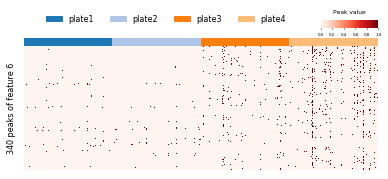

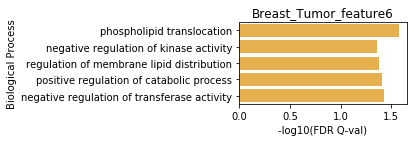

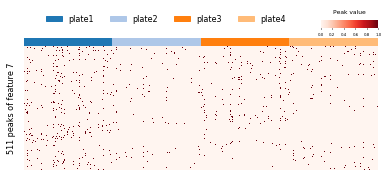

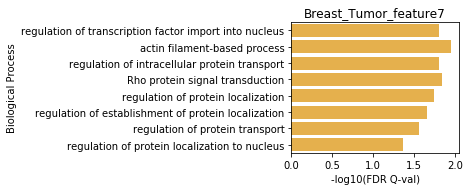

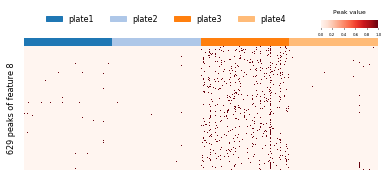

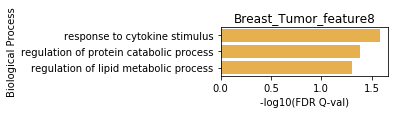

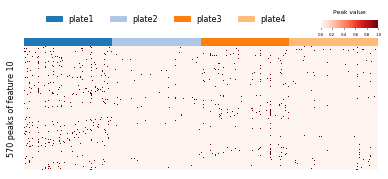

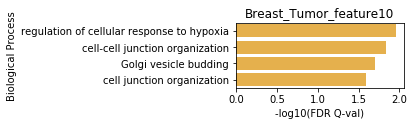

In [20]:
weight = get_decoder_weight(out_dir+'model.pt')
weight_index = sort_by_mad(raw.T).columns
specific_peaks = peak_selection(weight, weight_index)

for i, peak_index in enumerate(specific_peaks): # show the represented peaks of last two components of feature
    if i in [5, 6, 7, 9]:
        peak_data = raw.loc[peak_index]
        plot_heatmap(peak_data, labels_plate,
                     cmap='Reds', 
                     figsize=(8,3), 
                     cax_title='Peak value', 
                     ylabel='{} peaks of feature {}'.format(len(peak_index), i+1),
                     vmax=1, vmin=0, legend_font=8,
                     row_cluster=False,
                     show_legend=True,
                     show_cax = True,
                     ncol=4,
                     bbox_to_anchor=(0.4, 1.32),
                     save=None #'intepret_feature/feature_{}.pdf'.format(i+1)
                    )
        
        if os.path.isfile(out_dir+'GO_feature{}.txt'.format(i+1)):
            GO = pd.read_csv(out_dir+'GO_feature{}.txt'.format(i+1), sep='\t', skiprows=2, header=None).iloc[:, :5]
            GO.iloc[:, 3] = -np.log10(GO.iloc[:, 3])
            GO.columns = ['Biological Process', 'Rank', 'P-Value', '-log10(FDR Q-val)', 'Fold Enrichment']
            plt.figure(figsize=(3,GO.shape[0]*0.3))
            sns.barplot(x="-log10(FDR Q-val)", y="Biological Process", data=GO, color='orange', alpha=0.8)
            plt.title('Breast_Tumor_feature{}'.format(i+1))
            plt.show()